In [21]:
from pyspark.sql import SparkSession
import seaborn as sns
from pyspark.sql.functions import concat_ws

In [22]:
spark = SparkSession.builder.appName("plot").getOrCreate()

In [23]:
data = spark.read.parquet("data_parquet/*/*",header = True)

In [24]:
eventtype_data = data.select(concat_ws("_",'事故類型及型態大類別名稱', '事故類型及型態子類別名稱').alias('事故類型及型態類別名稱'), '事故類別名稱')

In [25]:
eventtype_data = eventtype_data.fillna(value=0)
eventtype_data.show(10) 

+----------------------+------------+
|事故類型及型態類別名稱|事故類別名稱|
+----------------------+------------+
|     車與車_路口交岔撞|          A2|
|     車與車_路口交岔撞|          A2|
|     車與車_路口交岔撞|          A2|
|           車與車_其他|          A2|
|           車與車_其他|          A2|
|           車與車_側撞|          A2|
|           車與車_側撞|          A2|
|           車與車_側撞|          A2|
|           車與車_側撞|          A2|
|           車與車_側撞|          A2|
+----------------------+------------+
only showing top 10 rows



In [27]:
eventtype_data.groupBy('事故類型及型態類別名稱').count().show()


+-------------------------------+------+
|         事故類型及型態類別名稱| count|
+-------------------------------+------+
|      人與汽(機)車_在路上作業中|  1479|
|    汽(機)車本身_撞號誌、標誌桿|  3060|
|        人與汽(機)車_在路上嬉戲|   316|
|      汽(機)車本身_撞非固定設施|  1825|
|              人與汽(機)車_其他| 35990|
|                    車與車_對撞| 29498|
|      汽(機)車本身_撞路樹、電桿| 12672|
|                    車與車_追撞|385503|
|        汽(機)車本身_撞工程施工|  1248|
|            汽(機)車本身_撞動物| 11384|
|                車與車_對向擦撞| 94144|
|              車與車_路口交岔撞|308724|
|      人與汽(機)車_佇立路邊(外)|  3139|
|        人與汽(機)車_穿越道路中| 81912|
|              汽(機)車本身_其他| 17311|
|                    車與車_其他|547592|
|        汽(機)車本身_撞護欄(樁)|  9340|
|                車與車_同向擦撞|343894|
|人與汽(機)車_從停車後(或中)穿出|  1139|
|  平交道事故_衝過(或撞壞)遮斷器|    11|
+-------------------------------+------+
only showing top 20 rows



/Users/shishihh/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from current font.
  func(*args, **kwargs)
/Users/shishihh/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25925 (\N{CJK UNIFIED IDEOGRAPH-6545}) missing from current font.
  func(*args, **kwargs)
/Users/shishihh/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from current font.
  func(*args, **kwargs)
/Users/shishihh/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  func(*args, **kwargs)
/Users/shishihh/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  func(*args, **kwargs)
/Users/shishihh/anaconda3/lib/python3.10/site

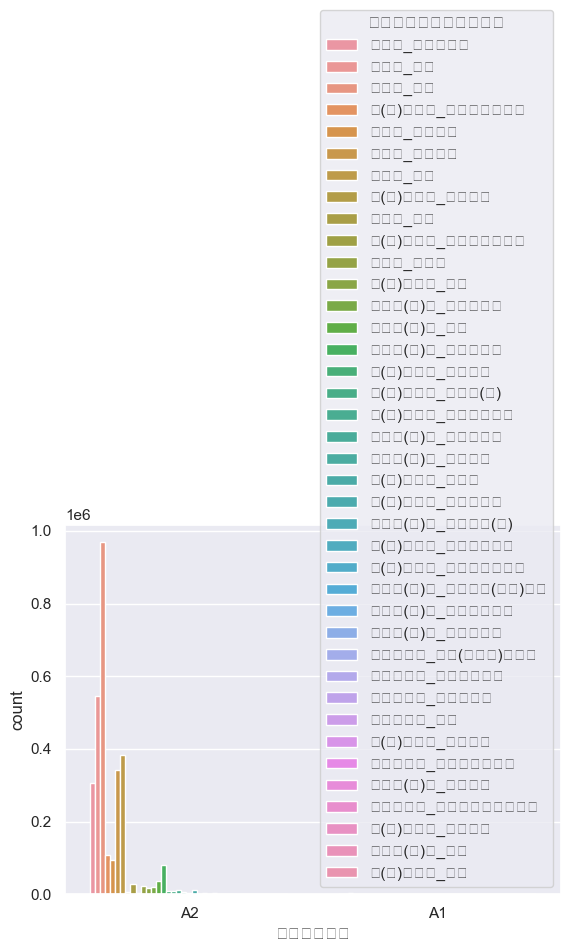

In [28]:
eventtype_ary = eventtype_data.toPandas()


sns.set(style="darkgrid")
#源数据集class代表三等舱位，who代表人员分类，男女小孩，对每一类人数计数
ax = sns.countplot(x="事故類別名稱", hue="事故類型及型態類別名稱", data=eventtype_ary)